In [0]:
from keras.datasets import reuters
import numpy as np
import pandas as pd

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(x_train))
print(len(x_test))

8982
2246


In [0]:
#vectorizing word sequences
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [0]:
#building the prediction model
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation= 'relu'))
#softmax is especially good for probability distribution
#46 layers because 46 categories
model.add(layers.Dense(46, activation='softmax'))

In [0]:

model.compile(optimizer = 'rmsprop',
         loss = 'categorical_crossentropy',
         metrics = ['accuracy'])



In [0]:
#setting aside 1000 examples for validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [0]:
history = model.fit(partial_x_train,
  partial_y_train,
  epochs=20,
  batch_size=512,
  validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 169us/step - loss: 2.6767 - accuracy: 0.4697 - val_loss: 1.7973 - val_accuracy: 0.6390
Epoch 2/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.4669 - accuracy: 0.6951 - val_loss: 1.3292 - val_accuracy: 0.7040
Epoch 3/20
7982/7982 [==============================] - 1s 131us/step - loss: 1.0775 - accuracy: 0.7663 - val_loss: 1.1269 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 134us/step - loss: 0.8450 - accuracy: 0.8215 - val_loss: 1.0093 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.6681 - accuracy: 0.8664 - val_loss: 0.9394 - val_accuracy: 0.8110
Epoch 6/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.5355 - accuracy: 0.8930 - val_loss: 0.9001 - val_accuracy: 0.8170
Epoch 7/20
7982/7982 [==============================] - 1s 130us/step - loss

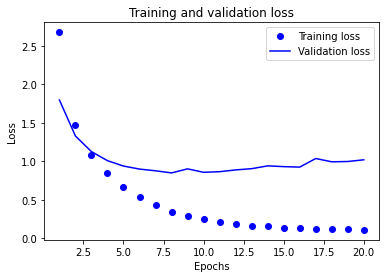

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()